<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-dsercam/blob/main/ActividadSemanal7_Notebook1_A01182676.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

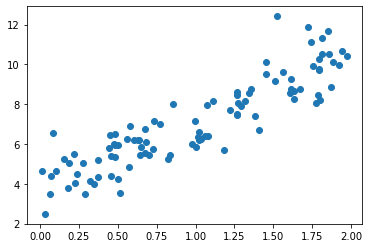

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

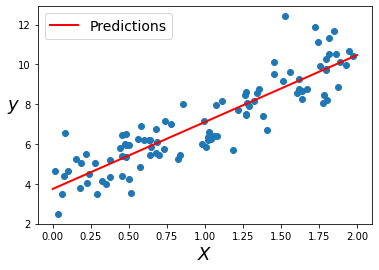

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

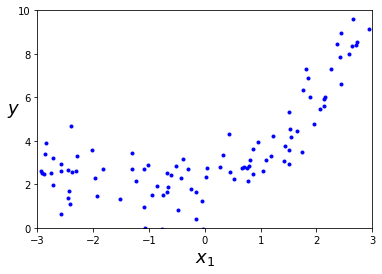

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

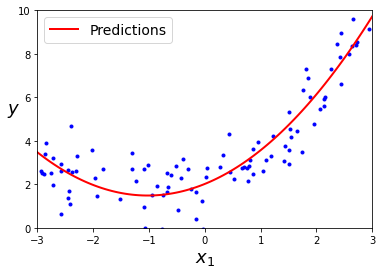

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
len(X)

1000

In [26]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

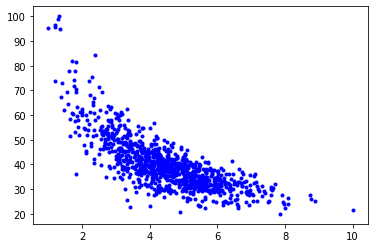

In [27]:
plt.plot(X,y,'b.')

### Parte 1 - Regresion lineal

In [103]:
#Particion de los datos:
from sklearn.model_selection import train_test_split #importamos la funcion train_test_split

#Utilizaremos una estrategia de 85% para datos de entrenamiento y 15% para datos de prueba, utilizamos un random sate de 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 850
Tamaño de X_train: (850, 1)
**************************************************
Mumero total de registros en el test dataset: 150
Tamaño del X_test: (150, 1)


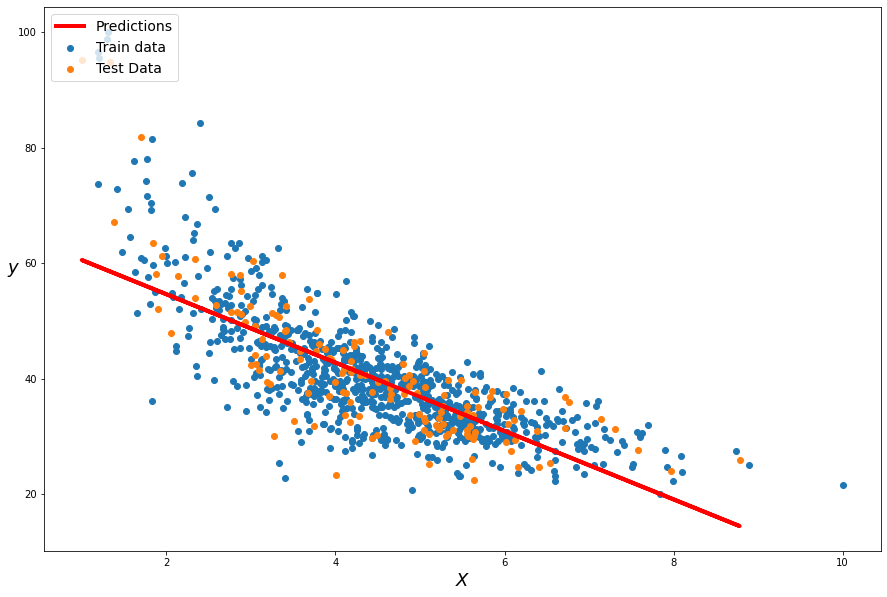

In [104]:
#lineal
from sklearn.linear_model import LinearRegression

#creamos nuestro objeto linear regressor
linearRegressor = LinearRegression(fit_intercept=True)
#entrenamos nuestro linear regressor con nuestra particion de datos de entrenamiento
linearRegressor.fit(X_train, y_train)
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fitTrain = linearRegressor.predict(X_train)
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fit = linearRegressor.predict(X_test)

plt.figure(figsize=(15,10))
#utilizamos un scatter plot para los datos originales
plt.scatter(X_train, y_train, label="Train data")
#utilizamos un scatter plot para los datos originales
plt.scatter(X_test, y_test, label="Test Data")
#utilizamos un plot line para graficarr nuestro linear regressor.
plt.plot(X_test, y_fit, "r-", linewidth=4, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [105]:
linearRegressor.coef_, linearRegressor.intercept_

(array([-5.91602323]), 66.44764675174278)

**The estimated model:**

#### $\hat{y} = -5.916X + 66.447$

In [106]:
from sklearn import metrics
from sklearn.metrics import r2_score

lrMAE = metrics.mean_absolute_error(y_test, y_fit)
lrRSE = np.sqrt(metrics.mean_squared_error(y_test, y_fit))
lrR2S = metrics.r2_score(y_test, y_fit)

print("*****"*15)
print('Linear Regeressor: Train Metrics : Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_fitTrain ))
print('Linear Regeressor: Train Metrics : Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_fitTrain)))
print('Linear Regeressor: Train Metrics : r2_score',metrics.r2_score(y_train, y_fitTrain))
print("*****"*15)
print('Linear Regeressor: Test Metrics : Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_fit))
print('Linear Regeressor: Test Metrics : Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_fit)))
print('Linear Regeressor: Test Metrics : r2_score',metrics.r2_score(y_test, y_fit))
print("*****"*15)

***************************************************************************
Linear Regeressor: Train Metrics : Error medio Absoluto (MAE): 4.888089732088765
Linear Regeressor: Train Metrics : Root Mean Squared Error: 6.806557245416021
Linear Regeressor: Train Metrics : r2_score 0.5698418288561948
***************************************************************************
Linear Regeressor: Test Metrics : Error medio Absoluto (MAE): 5.011595088997378
Linear Regeressor: Test Metrics : Root Mean Squared Error: 7.2416891490838875
Linear Regeressor: Test Metrics : r2_score 0.6171440942171167
***************************************************************************


### Parte 2 - Regresion polinomial

In [50]:
#polinomial

#utilizaremos un orde polinomial de dos
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#aplicamos un poly transform a nuestros datos
X_poly = poly_features.fit_transform(X)

#tambien utilizaremos una estrategia de 85% para datos de entrenamiento y 15% para datos de prueba, utilizamos un random sate de 101
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size = 0.15, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 850
Tamaño de X_train: (850, 2)
**************************************************
Mumero total de registros en el test dataset: 150
Tamaño del X_test: (150, 2)


In [87]:
#instanciamos un objeto de linear Regression
linearRegressorPoly = LinearRegression(fit_intercept=True)
#entrenamos utilizando nuestros datos polinomiales
linearRegressorPoly.fit(X_train_poly, y_train_poly)
#obtenemos nuestros coeficientes
linearRegressorPoly.coef_, linearRegressorPoly.intercept_

(array([-16.27563255,   1.12121998]), 88.38865903399889)

**The estimated model:**

#### $\hat{y} =  -16.275X +1.121X^2 + 88.38$

In [88]:
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fitTrain_poly = linearRegressorPoly.predict(X_train_poly)
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fit_poly = linearRegressorPoly.predict(X_test_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


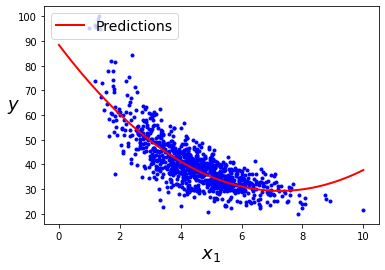

In [89]:
X_new=np.linspace(-0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = linearRegressorPoly.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


In [90]:
from sklearn import metrics
from sklearn.metrics import r2_score

polyMAE = metrics.mean_absolute_error(y_test_poly, y_fit_poly)
polyRSE = np.sqrt(metrics.mean_squared_error(y_test_poly, y_fit_poly))
polyR2S = metrics.r2_score(y_test_poly, y_fit_poly)

print("*****"*15)
print('Linear Regeressor: Train Metrics : Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train_poly, y_fitTrain_poly ))
print('Linear Regeressor: Train Metrics : Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_poly, y_fitTrain_poly)))
print('Linear Regeressor: Train Metrics : r2_score',metrics.r2_score(y_train_poly, y_fitTrain_poly))
print("*****"*15)
print('Linear Regeressor: Test Metrics : Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test_poly, y_fit_poly))
print('Linear Regeressor: Test Metrics : Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_poly, y_fit_poly)))
print('Linear Regeressor: Test Metrics : r2_score',metrics.r2_score(y_test_poly, y_fit_poly))
print("*****"*15)

***************************************************************************
Linear Regeressor: Train Metrics : Error medio Absoluto (MAE): 4.537520932938372
Linear Regeressor: Train Metrics : Root Mean Squared Error: 6.140203128683162
Linear Regeressor: Train Metrics : r2_score 0.6499430928372091
***************************************************************************
Linear Regeressor: Test Metrics : Error medio Absoluto (MAE): 4.459445302443204
Linear Regeressor: Test Metrics : Root Mean Squared Error: 6.081945518433532
Linear Regeressor: Test Metrics : r2_score 0.7299521995869951
***************************************************************************


### Parte 3 - Regresion Ridge

In [66]:
from sklearn.linear_model import Ridge,Lasso

In [67]:
#utilizaremos un orde polinomial de dos
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#aplicamos un poly transform a nuestros datos
X_poly = poly_features.fit_transform(X)

#tambien utilizaremos una estrategia de 85% para datos de entrenamiento y 15% para datos de prueba, utilizamos un random sate de 101
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size = 0.15, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 850
Tamaño de X_train: (850, 2)
**************************************************
Mumero total de registros en el test dataset: 150
Tamaño del X_test: (150, 2)


In [83]:
#instanciamos un objeto de linear Regression
ridgeRegressor = Ridge()
#entrenamos utilizando nuestros datos polinomiales
ridgeRegressor.fit(X_train_poly, y_train_poly)
#obtenemos nuestros coeficientes
ridgeRegressor.coef_, linearRegressorPoly.intercept_

(array([-16.02856067,   1.09564326]), 88.38865903399889)

**The estimated model:**

#### $\hat{y} =  -16.028X +1.095X^2 + 88.38$

In [84]:
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fitTrain_poly_ridge = ridgeRegressor.predict(X_train_poly)
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fit_poly_ridge = ridgeRegressor.predict(X_test_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


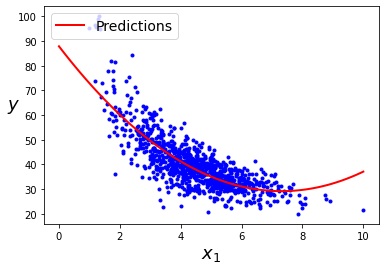

In [85]:
X_new=np.linspace(-0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = ridgeRegressor.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


In [86]:
from sklearn import metrics
from sklearn.metrics import r2_score

ridgeMAE = metrics.mean_absolute_error(y_test_poly, y_fit_poly_ridge)
ridgeRSE = np.sqrt(metrics.mean_squared_error(y_test_poly, y_fit_poly_ridge))
ridgeR2S = metrics.r2_score(y_test_poly, y_fit_poly_ridge)

print("*****"*15)
print('Linear Regeressor: Train Metrics : Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train_poly, y_fitTrain_poly_ridge ))
print('Linear Regeressor: Train Metrics : Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_poly, y_fitTrain_poly_ridge)))
print('Linear Regeressor: Train Metrics : r2_score',metrics.r2_score(y_train_poly, y_fitTrain_poly_ridge))
print("*****"*15)
print('Linear Regeressor: Test Metrics : Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test_poly, y_fit_poly_ridge))
print('Linear Regeressor: Test Metrics : Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_poly, y_fit_poly_ridge)))
print('Linear Regeressor: Test Metrics : r2_score',metrics.r2_score(y_test_poly, y_fit_poly_ridge))
print("*****"*15)

***************************************************************************
Linear Regeressor: Train Metrics : Error medio Absoluto (MAE): 4.532878081644214
Linear Regeressor: Train Metrics : Root Mean Squared Error: 6.140585191679356
Linear Regeressor: Train Metrics : r2_score 0.6498995281703834
***************************************************************************
Linear Regeressor: Test Metrics : Error medio Absoluto (MAE): 4.45644257105236
Linear Regeressor: Test Metrics : Root Mean Squared Error: 6.0942756321610485
Linear Regeressor: Test Metrics : r2_score 0.7288561373804443
***************************************************************************


### Parte 4 - Regresion Lasso

In [78]:
#utilizaremos un orde polinomial de dos
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#aplicamos un poly transform a nuestros datos
X_poly = poly_features.fit_transform(X)

#tambien utilizaremos una estrategia de 85% para datos de entrenamiento y 15% para datos de prueba, utilizamos un random sate de 101
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size = 0.15, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 850
Tamaño de X_train: (850, 2)
**************************************************
Mumero total de registros en el test dataset: 150
Tamaño del X_test: (150, 2)


In [79]:
#instanciamos un objeto de linear Regression
lassoRegressor = Lasso()
#entrenamos utilizando nuestros datos polinomiales
lassoRegressor.fit(X_train_poly, y_train_poly)
#obtenemos nuestros coeficientes
lassoRegressor.coef_, linearRegressorPoly.intercept_

(array([-4.62167185, -0.07841468]), 88.38865903399889)

**The estimated model:**

#### $\hat{y} =  -4.621X - 0.078X^2 + 88.38$

In [80]:
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fitTrain_lasso = lassoRegressor.predict(X_train_poly)
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fit_poly_lasso = lassoRegressor.predict(X_test_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


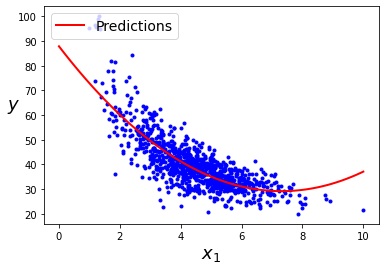

In [81]:
X_new=np.linspace(-0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = ridgeRegressor.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


In [82]:
from sklearn import metrics
from sklearn.metrics import r2_score

lassoMAE = metrics.mean_absolute_error(y_test_poly, y_fit_poly_lasso)
lassoRSE = np.sqrt(metrics.mean_squared_error(y_test_poly, y_fit_poly_lasso))
lassoR2S = metrics.r2_score(y_test_poly, y_fit_poly_lasso)

print("*****"*15)
print('Linear Regeressor: Train Metrics : Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train_poly, y_fitTrain_lasso ))
print('Linear Regeressor: Train Metrics : Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_poly, y_fitTrain_lasso)))
print('Linear Regeressor: Train Metrics : r2_score',metrics.r2_score(y_train_poly, y_fitTrain_lasso))
print("*****"*15)
print('Linear Regeressor: Test Metrics : Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test_poly, y_fit_poly_lasso))
print('Linear Regeressor: Test Metrics : Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_poly, y_fit_poly_lasso)))
print('Linear Regeressor: Test Metrics : r2_score',metrics.r2_score(y_test_poly, y_fit_poly_lasso))
print("*****"*15)

***************************************************************************
Linear Regeressor: Train Metrics : Error medio Absoluto (MAE): 4.898038932409921
Linear Regeressor: Train Metrics : Root Mean Squared Error: 6.938841761244852
Linear Regeressor: Train Metrics : r2_score 0.552959220822169
***************************************************************************
Linear Regeressor: Test Metrics : Error medio Absoluto (MAE): 5.150805902380525
Linear Regeressor: Test Metrics : Root Mean Squared Error: 7.519095197679952
Linear Regeressor: Test Metrics : r2_score 0.5872503059010867
***************************************************************************


### Parte 5 - Grafica comapracion de metricas

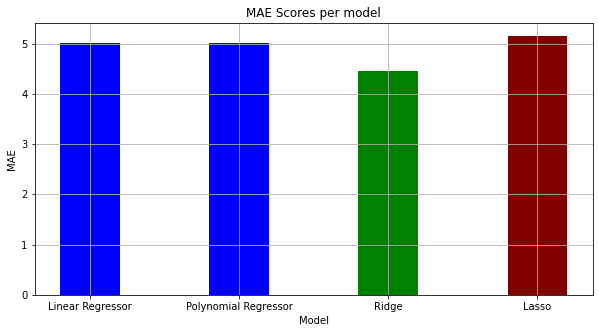

In [110]:
data = {'Linear Regressor':lrMAE, 'Polynomial Regressor' :polyMAE, 'Ridge':ridgeMAE,'Lasso':lassoMAE}
models = list(data.keys())
scores = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, scores, color=['blue', 'blue', 'green', 'maroon'],
        width = 0.4)
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("MAE Scores per model")
plt.grid()
plt.show()


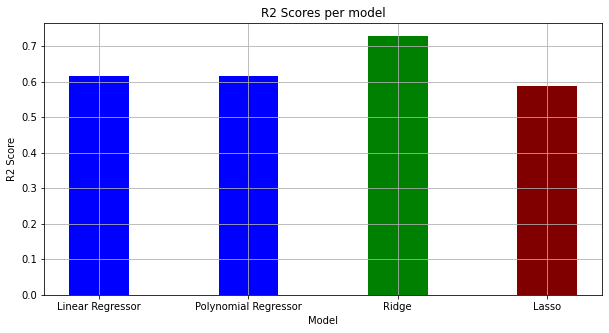

In [111]:
data = {'Linear Regressor':lrR2S, 'Polynomial Regressor' :polyR2S, 'Ridge':ridgeR2S,'Lasso':lassoR2S}
models = list(data.keys())
scores = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, scores, color=['blue', 'blue', 'green', 'maroon'],
        width = 0.4)
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("R2 Scores per model")
plt.grid()
plt.show()

### Parte 6 - Resutlados

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

In [ ]:
#tu codigo aquí